In [1]:
# libraries
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data
# dataset: https://archive.ics.uci.edu/dataset/109/wine
data = pd.read_csv("wine_data.csv", delimiter=",", index_col=0)
data.head(10)
data.columns

Index(['Cultivar', 'Alcohol', 'Malic acid', 'Ash', 'Flavanoids',
       'Color intensity', 'OD280/OD315'],
      dtype='object')

Text(0.5, 1.0, 'stripplot')

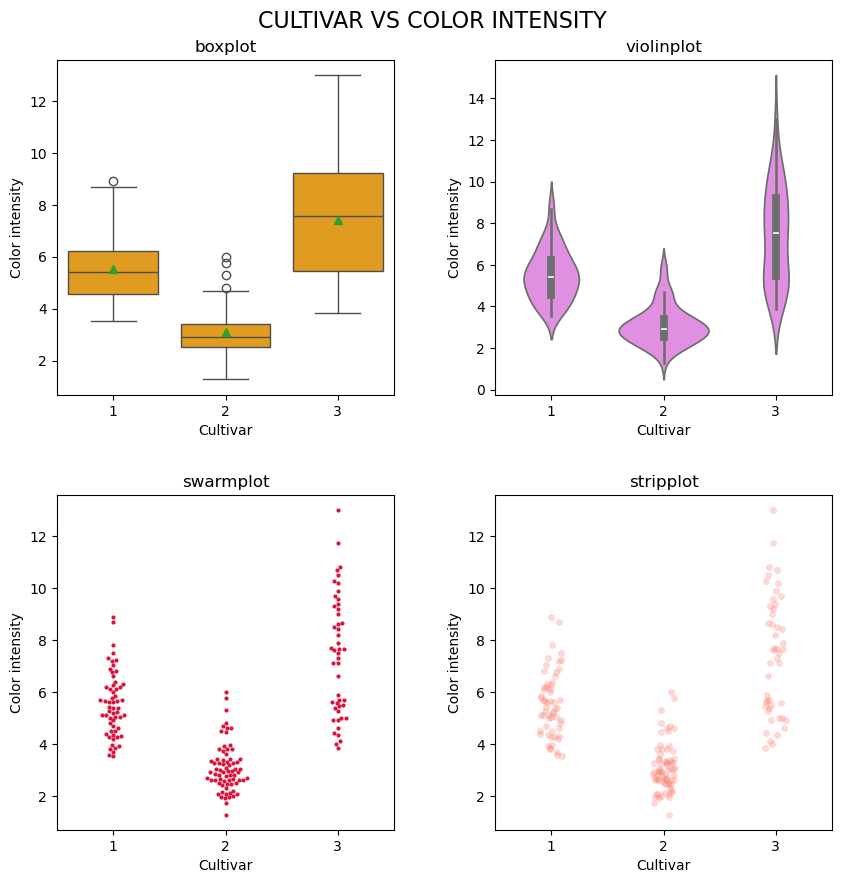

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.suptitle("CULTIVAR VS COLOR INTENSITY", fontsize=16, y=0.93)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

sns.boxplot(data=data, x="Cultivar", y="Color intensity", color="orange", ax=axes[0,0], showmeans=True)
axes[0,0].set_title("boxplot")

sns.violinplot(data=data, x="Cultivar", y="Color intensity", color='violet', ax=axes[0,1])
axes[0,1].set_title("violinplot")

sns.swarmplot(data=data, x="Cultivar", y="Color intensity", color="crimson", s=3, ax=axes[1,0])
axes[1,0].set_title("swarmplot")

sns.stripplot(data=data, x="Cultivar", y="Color intensity", color="salmon", alpha=0.3, ax=axes[1,1])
axes[1,1].set_title("stripplot")

<Axes: xlabel='Cultivar', ylabel='OD280/OD315'>

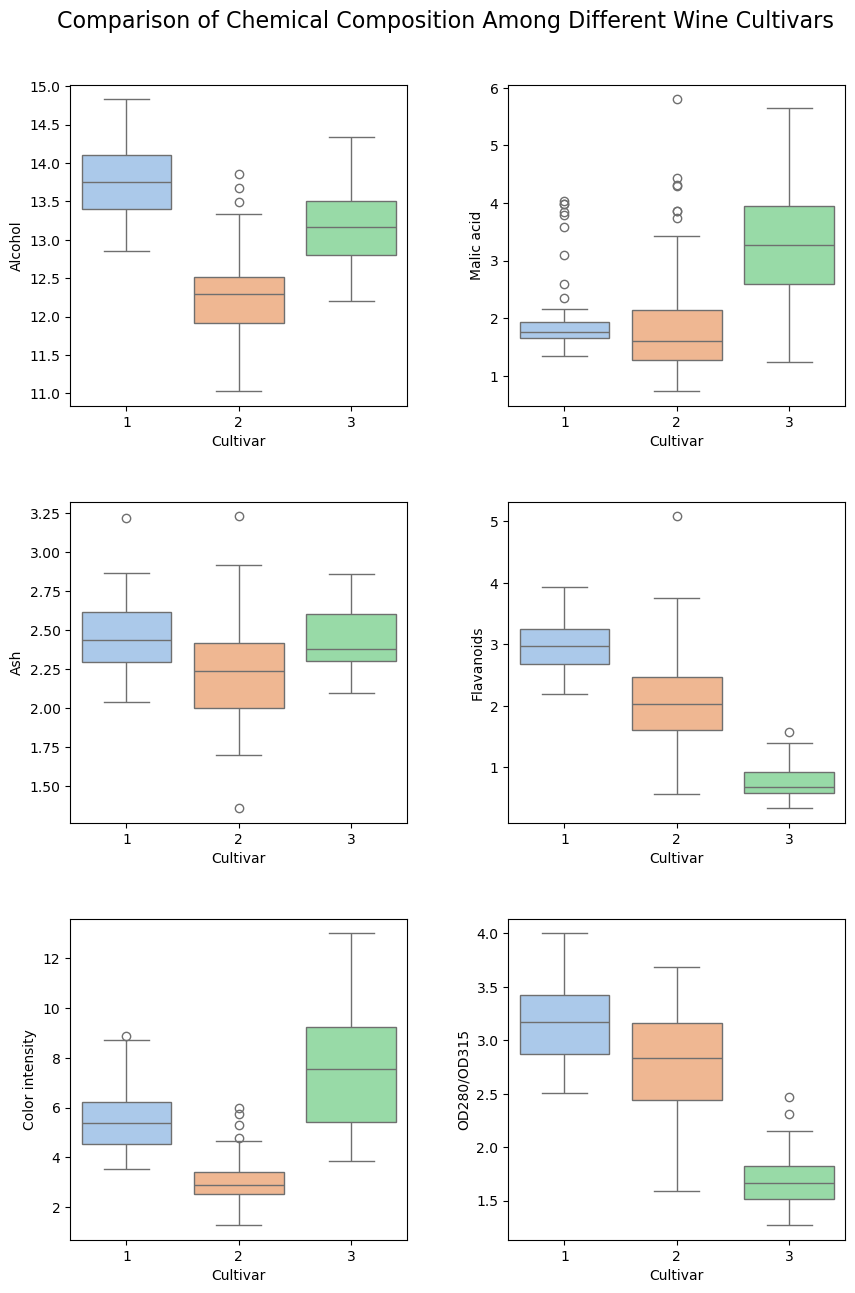

In [4]:
# boxplots
fig2, axes2 = plt.subplots(3, 2, figsize=(10,15))
fig2.suptitle("Comparison of Chemical Composition Among Different Wine Cultivars", fontsize=16, y=0.93)
fig2.subplots_adjust(wspace=0.3, hspace=0.3)

sns.boxplot(data=data, x="Cultivar", y="Alcohol", hue="Cultivar", palette="pastel", legend=False, ax=axes2[0,0])
sns.boxplot(data=data, x="Cultivar", y="Malic acid", hue="Cultivar", palette="pastel", legend=False, ax=axes2[0,1])
sns.boxplot(data=data, x="Cultivar", y="Ash", hue="Cultivar", palette="pastel", legend=False, ax=axes2[1,0])
sns.boxplot(data=data, x="Cultivar", y="Flavanoids", hue="Cultivar", palette="pastel", legend=False, ax=axes2[1,1])
sns.boxplot(data=data, x="Cultivar", y="Color intensity", hue="Cultivar", palette="pastel", legend=False, ax=axes2[2,0])
sns.boxplot(data=data, x="Cultivar", y="OD280/OD315", hue="Cultivar", palette="pastel", legend=False, ax=axes2[2,1])

<Axes: xlabel='Cultivar', ylabel='OD280/OD315'>

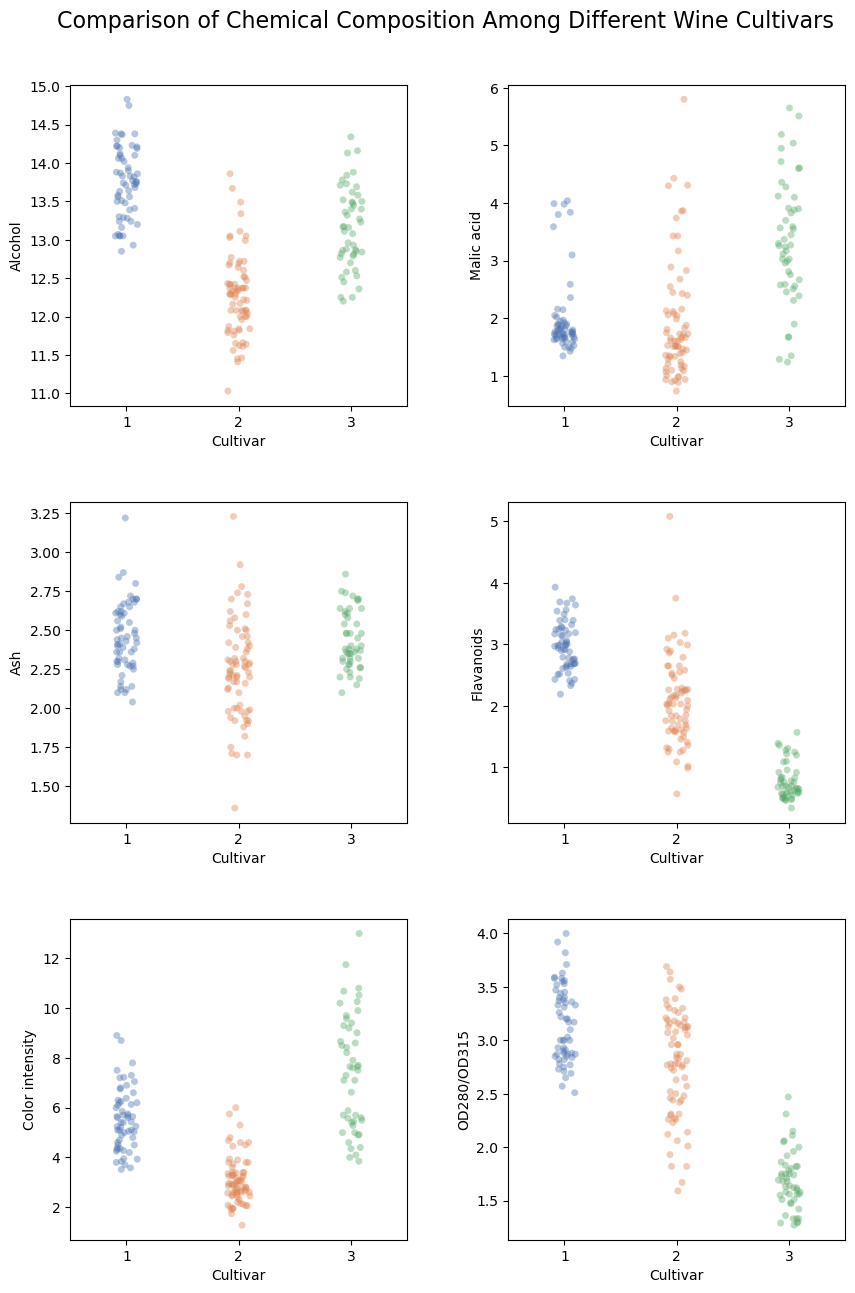

In [5]:
# stripplots

fig3, axes3 = plt.subplots(3, 2, figsize=(10,15))
fig3.suptitle("Comparison of Chemical Composition Among Different Wine Cultivars", fontsize=16, y=0.93)
fig3.subplots_adjust(wspace=0.3, hspace=0.3)

sns.stripplot(data=data, x="Cultivar", y="Alcohol", hue="Cultivar", palette="deep", s = 5, alpha = 0.4,
              legend=False, ax=axes3[0,0])
sns.stripplot(data=data, x="Cultivar", y="Malic acid", hue="Cultivar", palette="deep", s = 5, alpha = 0.4,
              legend=False, ax=axes3[0,1])
sns.stripplot(data=data, x="Cultivar", y="Ash", hue="Cultivar", palette="deep", s = 5, alpha = 0.4,
              legend=False, ax=axes3[1,0])
sns.stripplot(data=data, x="Cultivar", y="Flavanoids", hue="Cultivar", palette="deep", s = 5, alpha = 0.4,
              legend=False, ax=axes3[1,1])
sns.stripplot(data=data, x="Cultivar", y="Color intensity", hue="Cultivar", palette="deep", s = 5, alpha = 0.4,
              legend=False, ax=axes3[2,0])
sns.stripplot(data=data, x="Cultivar", y="OD280/OD315", hue="Cultivar", palette="deep", s = 5, alpha = 0.4,
              legend=False, ax=axes3[2,1])

In [6]:
# statistics
statistics = pd.DataFrame.describe(data)
print(statistics)

         Cultivar     Alcohol  Malic acid         Ash  Flavanoids  \
count  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517    2.029270   
std      0.775035    0.811827    1.117146    0.274344    0.998859   
min      1.000000   11.030000    0.740000    1.360000    0.340000   
25%      1.000000   12.362500    1.602500    2.210000    1.205000   
50%      2.000000   13.050000    1.865000    2.360000    2.135000   
75%      3.000000   13.677500    3.082500    2.557500    2.875000   
max      3.000000   14.830000    5.800000    3.230000    5.080000   

       Color intensity  OD280/OD315  
count       178.000000   178.000000  
mean          5.058090     2.611685  
std           2.318286     0.709990  
min           1.280000     1.270000  
25%           3.220000     1.937500  
50%           4.690000     2.780000  
75%           6.200000     3.170000  
max          13.000000     4.000000  


In [7]:
# skew and curtosis for each column
skew_values = data.skew()
kurt_values = data.kurtosis()

for col in data.columns:
    print(f"{col}\nSkew: {skew_values[col]:.4f} --- Kurtosis: {kurt_values[col]:.4f}\n")

Cultivar
Skew: 0.1074 --- Kurtosis: -1.3228

Alcohol
Skew: -0.0515 --- Kurtosis: -0.8525

Malic acid
Skew: 1.0397 --- Kurtosis: 0.2992

Ash
Skew: -0.1767 --- Kurtosis: 1.1440

Flavanoids
Skew: 0.0253 --- Kurtosis: -0.8804

Color intensity
Skew: 0.8686 --- Kurtosis: 0.3815

OD280/OD315
Skew: -0.3073 --- Kurtosis: -1.0864



In [8]:
# adding skew and kurt rows to the statistics df
statistics.loc['skew'] = skew_values
statistics.loc['kurt'] = kurt_values
statistics

,Cultivar,Alcohol,Malic acid,Ash,Flavanoids,Color intensity,OD280/OD315
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,2.029270,5.058090,2.611685
std,0.775035,0.811827,1.117146,0.274344,0.998859,2.318286,0.709990
min,1.000000,11.030000,0.740000,1.360000,0.340000,1.280000,1.270000
25%,1.000000,12.362500,1.602500,2.210000,1.205000,3.220000,1.937500
50%,2.000000,13.050000,1.865000,2.360000,2.135000,4.690000,2.780000
75%,3.000000,13.677500,3.082500,2.557500,2.875000,6.200000,3.170000
max,3.000000,14.830000,5.800000,3.230000,5.080000,13.000000,4.000000
skew,0.107431,-0.051482,1.039651,-0.176699,0.025344,0.868585,-0.307285
kurt,-1.322787,-0.852500,0.299207,1.143978,-0.880382,0.381522,-1.086435


In [9]:
# the sample Pearson correlation coefficient
# axis X - OD280/OD315
# axis Y - Flavanoids

x = data["OD280/OD315"]
y = data["Flavanoids"]

x_mean = np.mean(x)
y_mean = np.mean(y)

x_diff = x_mean - x
y_diff = y_mean - y

numerator = np.sum(x_diff*y_diff)
denominator = np.sqrt(np.sum(x_diff**2))*np.sqrt(np.sum(y_diff**2))
r = numerator/denominator
print(f"The Pearson correlation coefficient is {r}.")

The Pearson correlation coefficient is 0.7871939018669516.


In [10]:
# the pairwise correlation of all columns in data

r_table = pd.DataFrame.corr(data)
print(r_table)

                 Cultivar   Alcohol  Malic acid       Ash  Flavanoids  \
Cultivar         1.000000 -0.328222    0.437776 -0.049643   -0.847498   
Alcohol         -0.328222  1.000000    0.094397  0.211545    0.236815   
Malic acid       0.437776  0.094397    1.000000  0.164045   -0.411007   
Ash             -0.049643  0.211545    0.164045  1.000000    0.115077   
Flavanoids      -0.847498  0.236815   -0.411007  0.115077    1.000000   
Color intensity  0.265668  0.546364    0.248985  0.258887   -0.172379   
OD280/OD315     -0.788230  0.072343   -0.368710  0.003911    0.787194   

                 Color intensity  OD280/OD315  
Cultivar                0.265668    -0.788230  
Alcohol                 0.546364     0.072343  
Malic acid              0.248985    -0.368710  
Ash                     0.258887     0.003911  
Flavanoids             -0.172379     0.787194  
Color intensity         1.000000    -0.428815  
OD280/OD315            -0.428815     1.000000  


<Axes: title={'center': 'Heatmap'}>

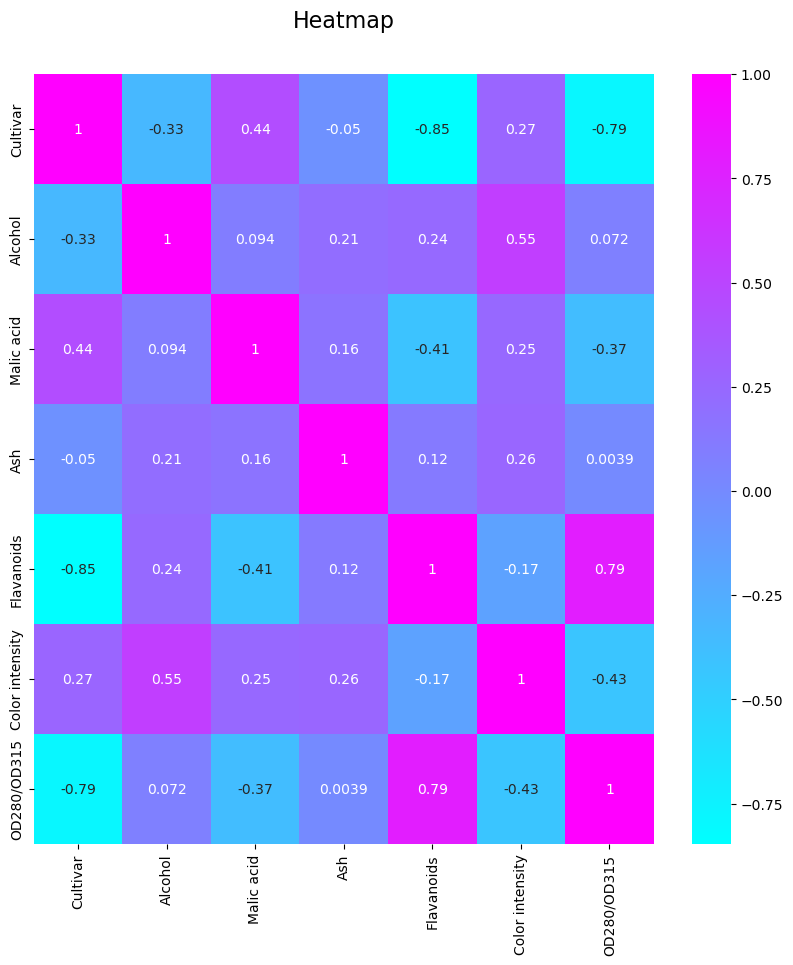

In [11]:
# heatmap
fig4 = plt.figure(figsize=(10,10))
plt.title("Heatmap", fontsize=16, y=1.05)
fig4.set_facecolor("white")

sns.heatmap(r_table, annot=True, cmap="cool")

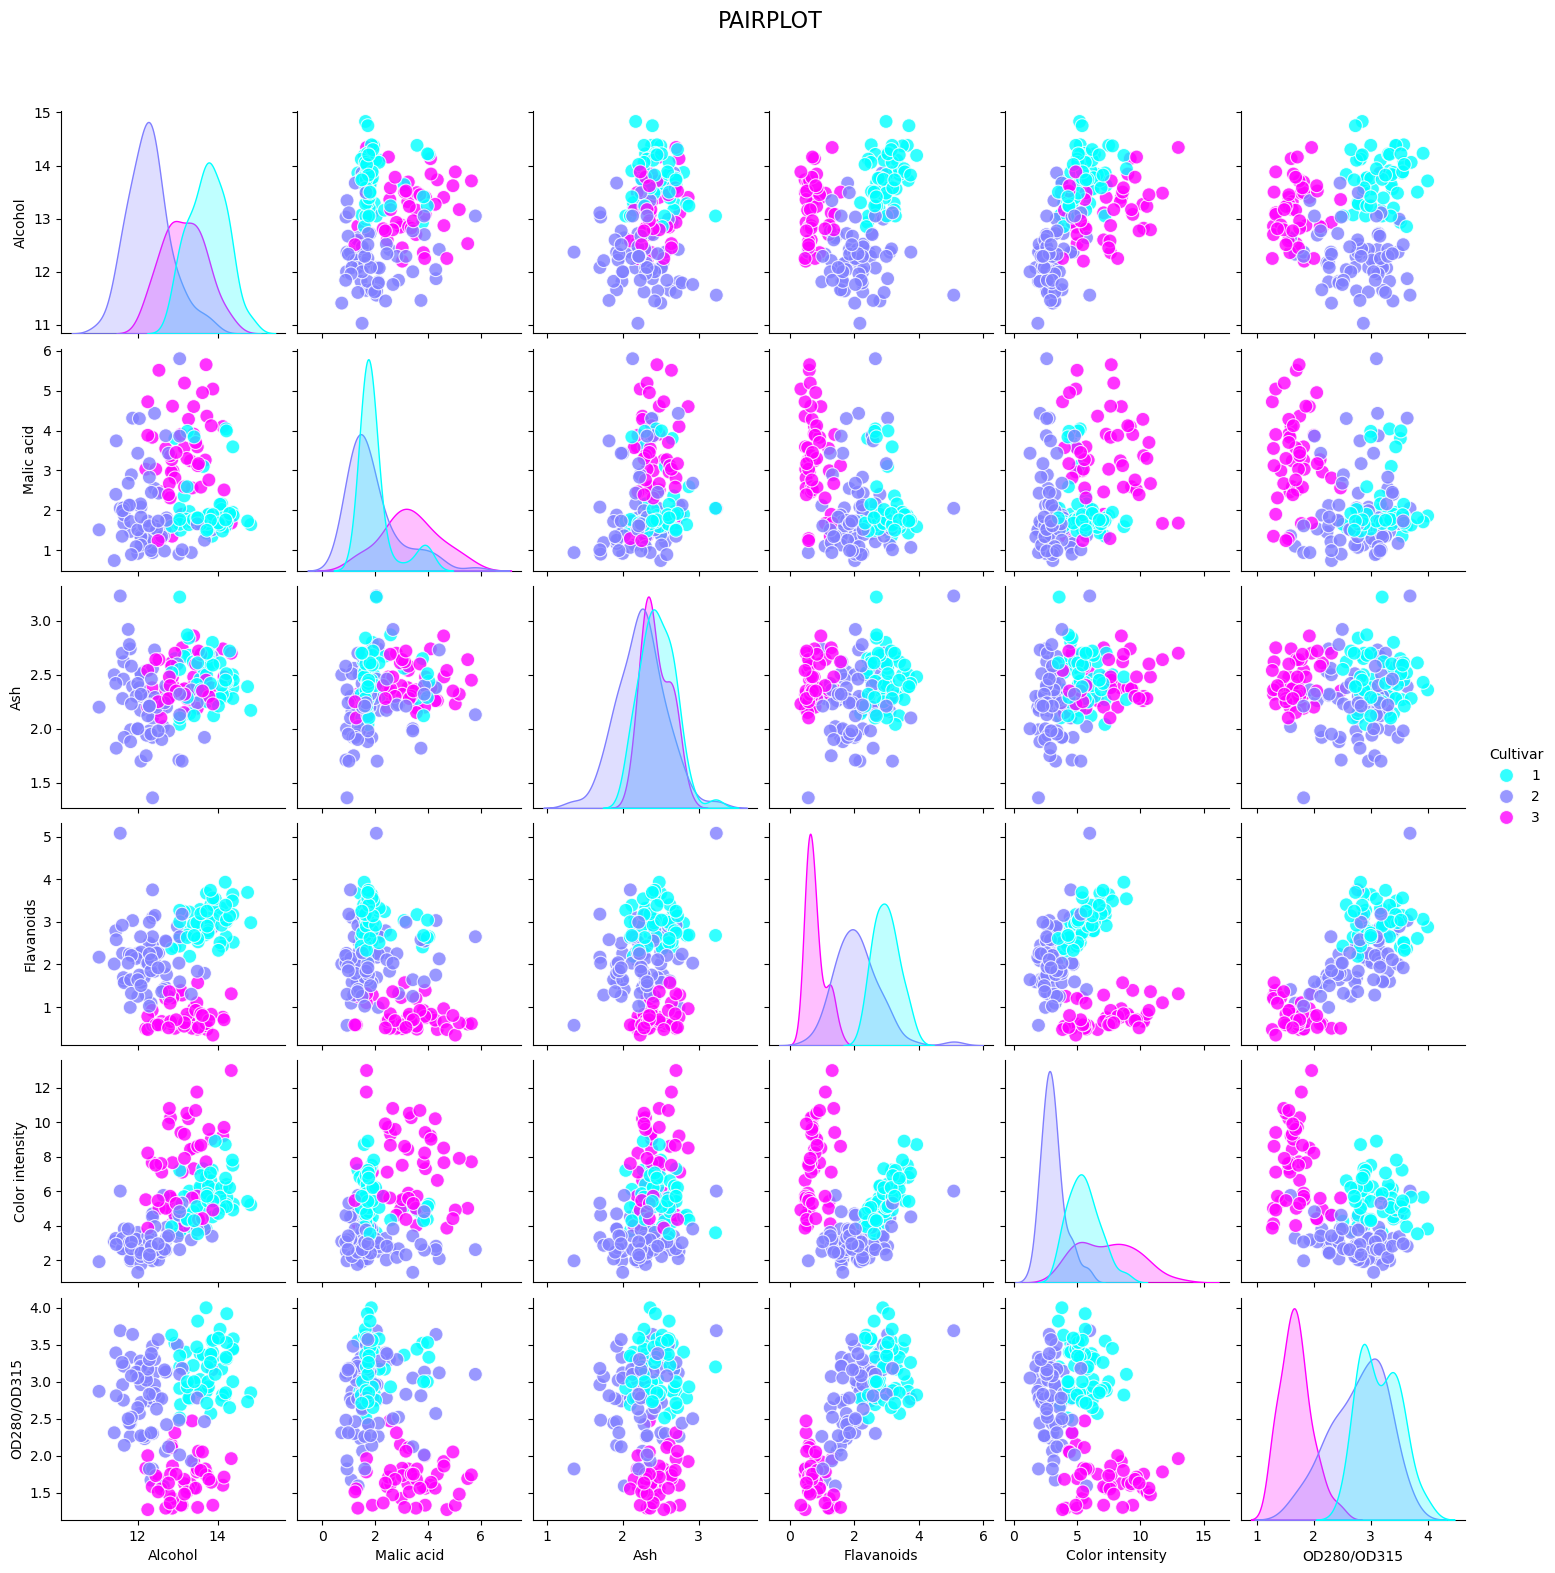

In [12]:
# pairplot
fig5 = sns.pairplot(data=data, hue="Cultivar", palette="cool", plot_kws={'s':100, 'alpha':0.8}, markers='o')
fig5.fig.suptitle("PAIRPLOT", fontsize=16, y=1.05);
fig5.fig.set_facecolor("white")
fig5

In [14]:
# linear regression coefficients

x = data["OD280/OD315"]
y = data["Flavanoids"]

x_mean = np.mean(x)
y_mean = np.mean(y)

x_diff = x_mean - x
y_diff = y_mean - y

a1 = np.sum(x_diff * y_diff) / np.sum(x_diff**2)
b1 = y_mean - a1*x_mean
print(f"a = {a1}\nb = {b1}")

a = 1.107473331774143
b = -0.8631022610964245


In [15]:
# linear regression coefficients using sp.stats.linregress

a2 = sp.stats.linregress(x,y)[0]
b2 = sp.stats.linregress(x,y)[1]
print(f"a = {a2}\nb = {b2}")

a = 1.107473331774143
b = -0.8631022610964245


In [16]:
# checking
print(a1 == a2, b1 == b2)

True True


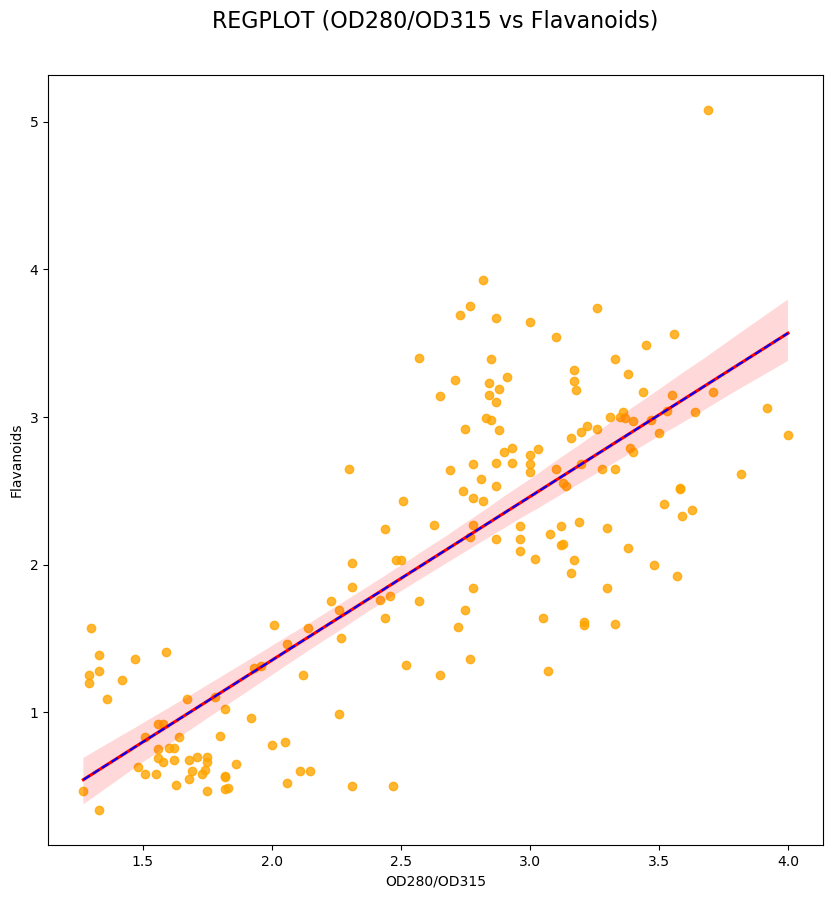

In [17]:
# checking - visualization
fig6 = plt.figure(figsize=(10,10))
plt.title("REGPLOT (OD280/OD315 vs Flavanoids)", fontsize=16, y=1.05)
fig6.set_facecolor("white")

sns.regplot(x=x, y=y, scatter_kws={"color": "orange"}, line_kws={"color":"red"})

x_values = np.linspace(min(x), max(x), 100)
y_values = a1 * x_values + b1

plt.plot(x_values, y_values, linestyle="--", color="blue")

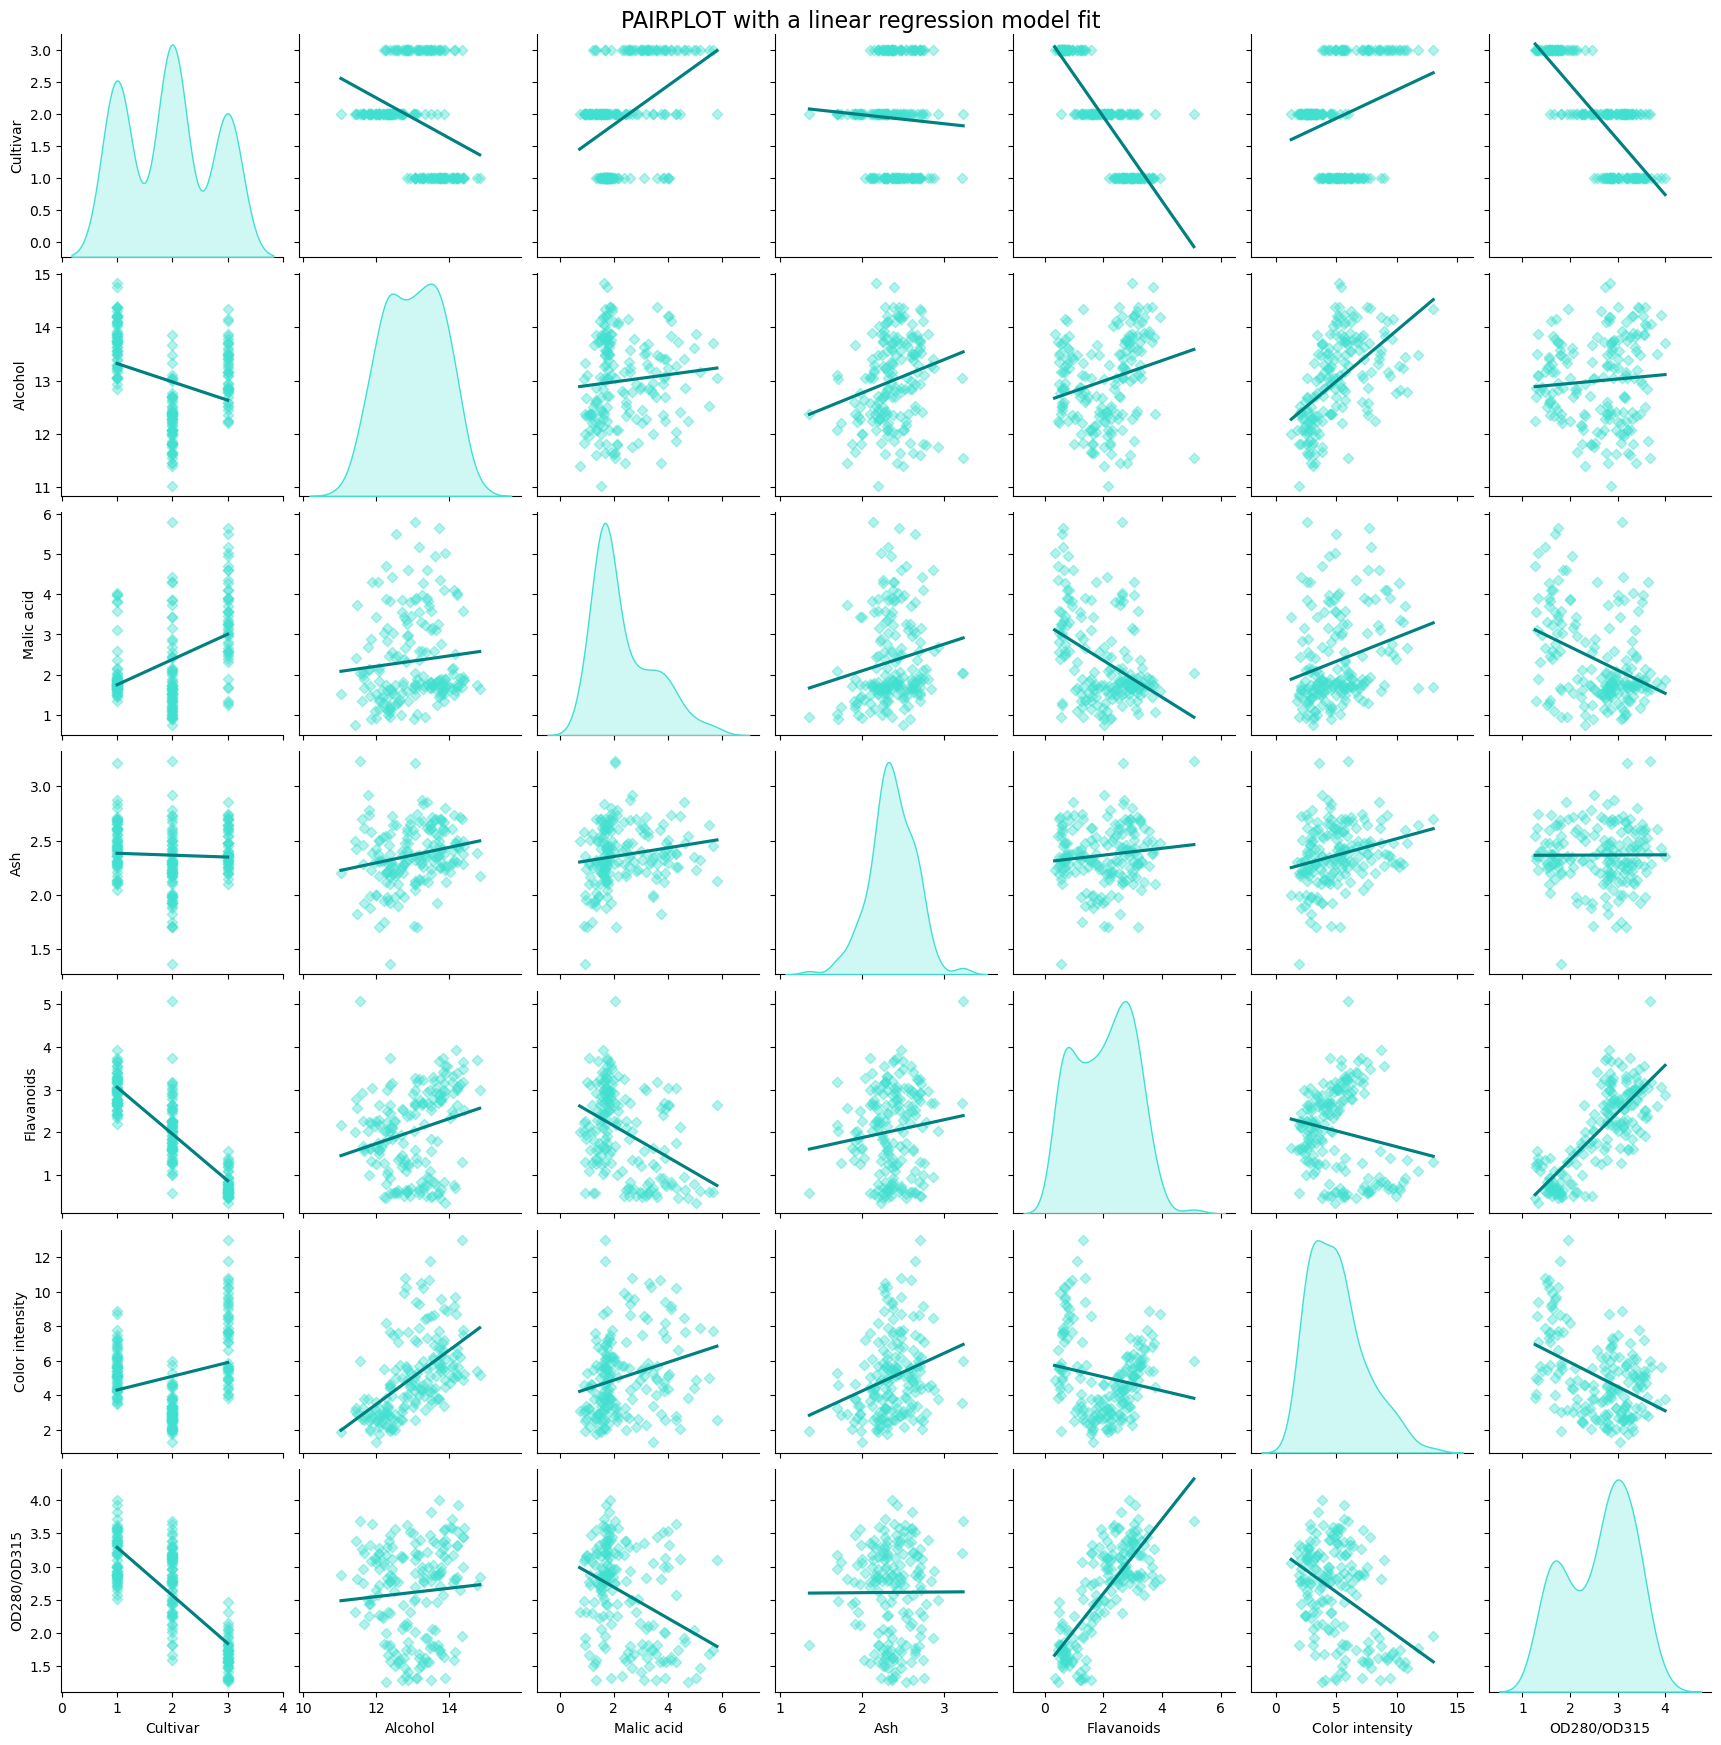

In [18]:
# pairplot
fig6 = sns.pairplot(data, diag_kind="kde", kind="reg", diag_kws={'color':"turquoise"}, 
             plot_kws={'color':"teal", 'ci':None, 
             'scatter_kws':{'color':'turquoise', 'alpha':0.4, 's':28}}, markers='D')
fig6.fig.suptitle("PAIRPLOT with a linear regression model fit", fontsize=16, y=1.00)
fig6.fig.set_facecolor("white")
fig6

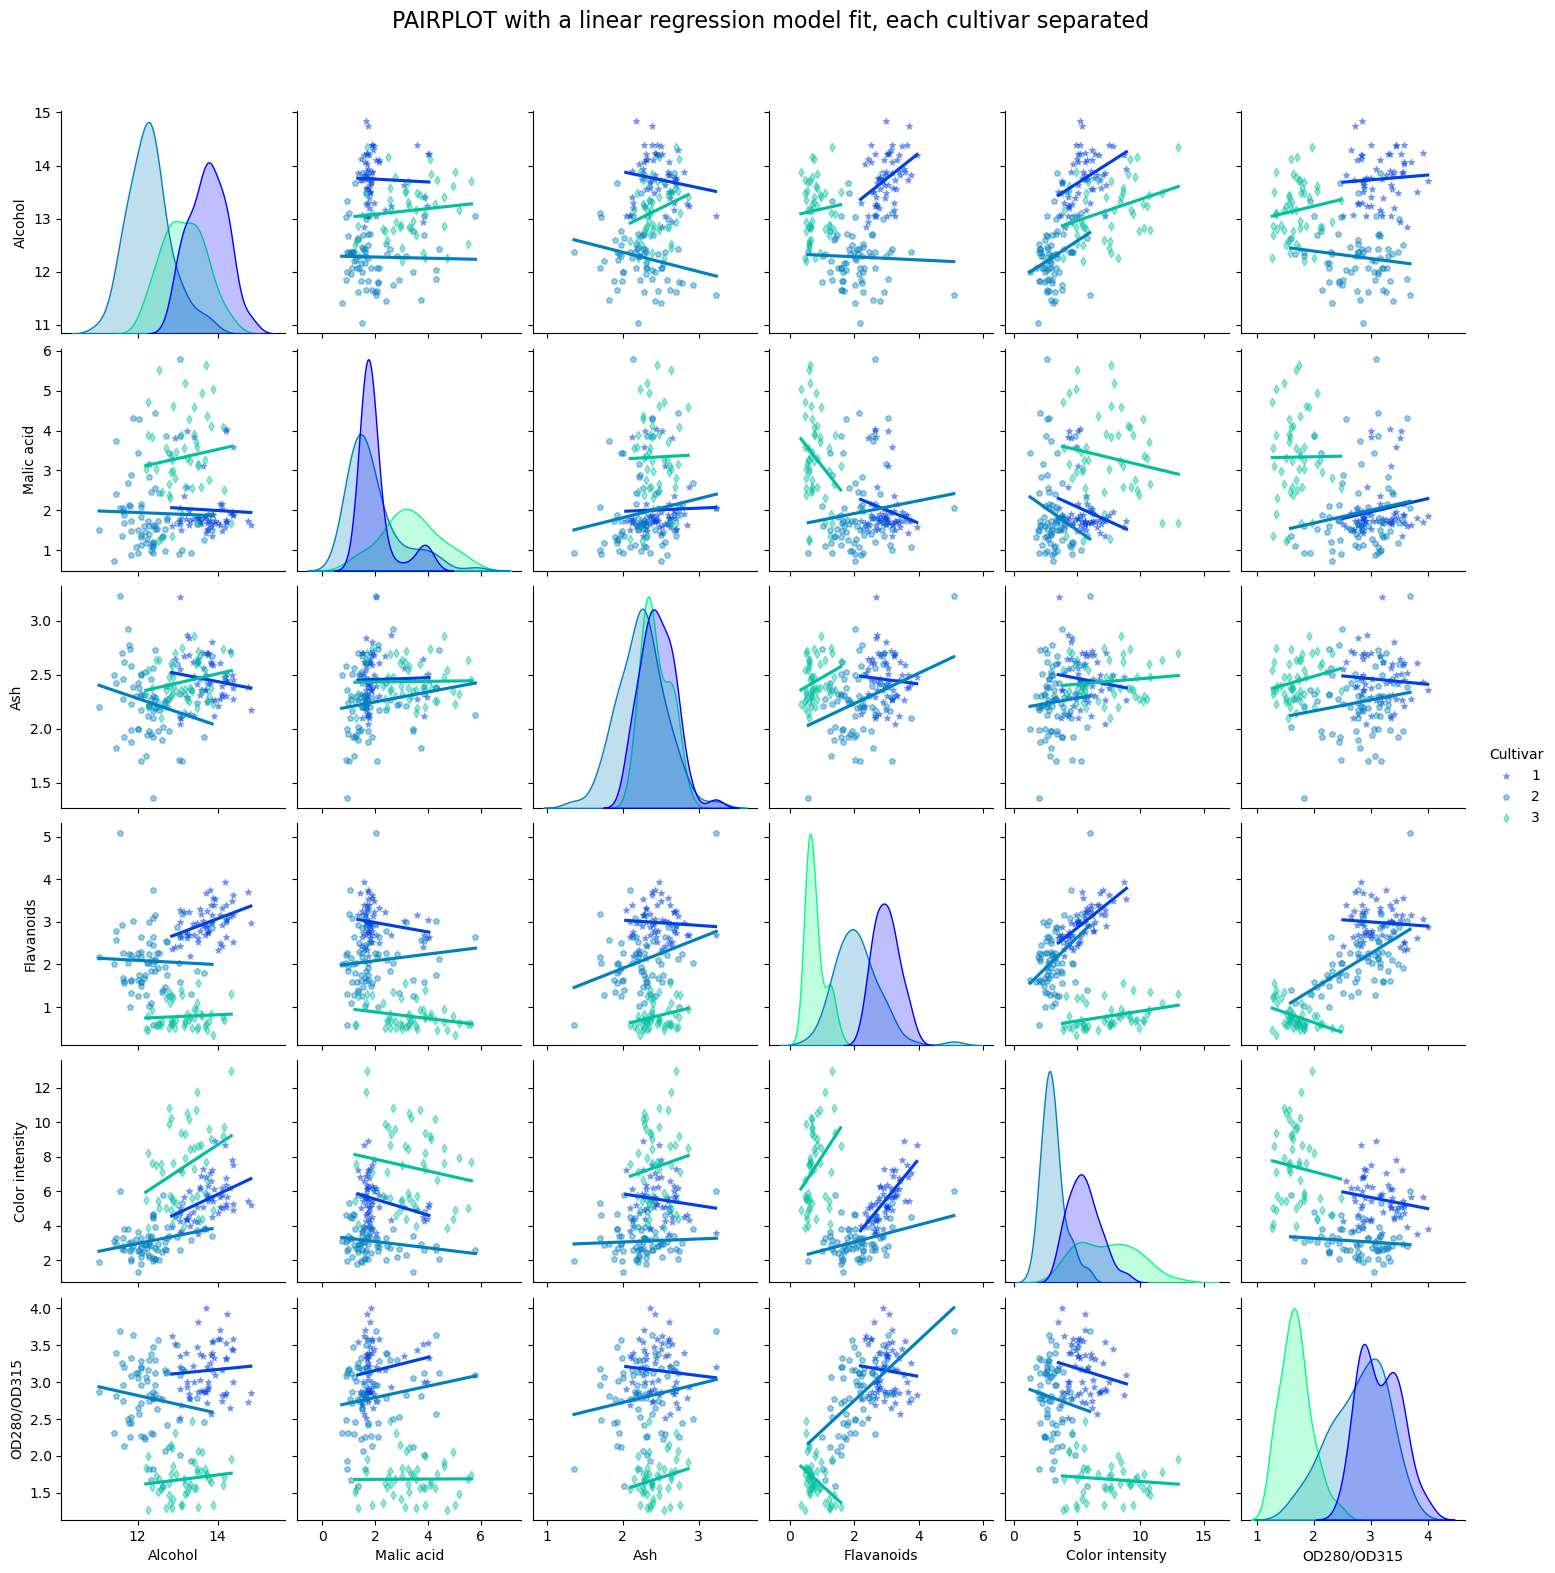

In [19]:
# pairplot, each Cultivar separated

fig7 = sns.pairplot(data, kind="reg",diag_kind="kde",hue="Cultivar", palette="winter", 
                plot_kws={'ci':None, 'scatter_kws':{'alpha':0.4, 's':20}},
                markers=['*','p','d'])

fig7.fig.suptitle("PAIRPLOT with a linear regression model fit, each cultivar separated", fontsize=16, y=1.05)
fig7.fig.set_facecolor("white")
fig7
